In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results
from find_optimal_parameters import  plot_F1_heatmap,get_opt_params, F1_per_bic

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "DeBi"
tool_suffix = "DeBi"
n_runs = 1

parameters = (("p",["u"]),("b",[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5])) # b == binarization_level 

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/F1/img"
tsv_outdir = "../simulated_datasets/results/F1/"



In [9]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 11
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 220
Non-zero runs: 220


In [10]:
results.tail()

,F1 per best match,F1 per bicluster,b,n_biclusters,n_genes,n_run,n_samples,p
215,0.421426,0.282491,1.5,80,50,1,100,u
216,0.788810,0.324679,1.5,73,100,1,10,u
217,0.664277,0.291564,1.5,48,100,1,20,u
218,0.391079,0.222417,1.5,80,100,1,50,u
219,0.275229,0.158135,1.5,163,100,1,100,u


In [11]:
parameters

(('p', ['u']), ('b', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]))

Total combinations: 11
Total combinations: 11
Combinations with mean F1 > 0.0 11


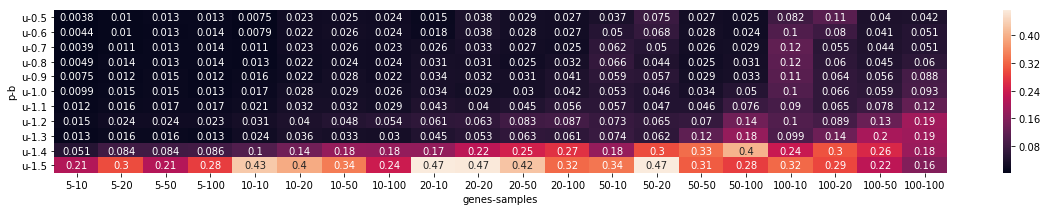

In [12]:
params = ["p","b"]
plot_file = img_outdir+"/" + tool_suffix+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.00,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [13]:
parameters

(('p', ['u']), ('b', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]))

In [14]:
default_params = ("u",1.0)

In [15]:

r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 220 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	p=u;
	b=1.5;
	Max. avg. F1 per bicluster:0.325±0.094
	avg. F1 per best match:0.518±0.179
	biclusters per run:51.5±34.5
With default parameters:
	p=u;
	b=1.0;
	avg. F1 per bicluster:0.04±0.026
	avg. F1 per best match:0.574±0.126
	biclusters per run:614.0±135.5


F1 per bicluster                                     F1 per best match  \
                  mean       std count       max       min              mean   
p b                                                                            
u 1.5         0.325110  0.094080    20  0.472772  0.158135          0.517773   
  1.4         0.200647  0.094088    20  0.403259  0.050744          0.562677   
  1.3         0.072698  0.060372    20  0.198576  0.012735          0.574679   
  1.2         0.070764  0.044665    20  0.191675  0.015495          0.579008   
  1.1         0.047132  0.028700    20  0.124167  0.012426          0.578946   
  1.0         0.039595  0.025519    20  0.103799  0.009851          0.574046   
  0.9         0.038531  0.027001    20  0.111497  0.007483          0.547297   
  0.8         0.034785  0.025686    20  0.116985  0.004882          0.517146   
  0.6         0.033784  0.025357    20  0.101147  0.004389          0.475584   
  0.7         0.033727  0.025805    20  0.120027  0.003899          0.500754   
  0.5         0.033455  0.027106    20  0.111134  0.003809          0.446497   

                                          n_biclusters                         \
            std count       max       min         mean         std count  max   
p b                                                                             
u 1.5  0.179444    20  0.808482  0.167791        51.45   34.494050    20  163   
  1.4  0.158207    20  0.802290  0.277173        97.45   22.215393    20  151   
  1.3  0.151534    20  0.770020  0.301129       420.65  157.163433    20  637   
  1.2  0.136863    20  0.742948  0.314201       332.40   82.502568    20  408   
  1.1  0.131855    20  0.732691  0.294458       525.25  111.037630    20  635   
  1.0  0.125605    20  0.728087  0.258139       614.05  135.460025    20  744   
  0.9  0.137532    20  0.690445  0.178472       660.70  145.018728    20  795   
  0.8  0.145025    20  0.657341  0.055569       712.25  139.992434    20  859   
  0.6  0.157392    20  0.644015  0.047440       748.90  139.270241    20  878   
  0.7  0.148107    20  0.652803  0.062615       742.75  145.147430    20  861   
  0.5  0.164819    20  0.631410  0.042891       776.10  128.145025    20  885   

           F1 per bicluster  
       min           n_runs  
p b                          
u 1.5    8              1.0  
  1.4   45              1.0  
  1.3   90              1.0  
  1.2   54              1.0  
  1.1  269              1.0  
  1.0  303              1.0  
  0.9  303              1.0  
  0.8  391              1.0  
  0.6  388              1.0  
  0.7  397              1.0  
  0.5  470              1.0